# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 18, alternate_sign=False, stop_words='english')
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='moviereviews_train.tsv', my_random_seed=21)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 262144)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 5158, 'TN': 4871, 'FP': 5130, 'FN': 4841, 'Accuracy': 0.50145, 'Precision': 0.5013608087091758, 'Recall': 0.5158515851585158, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9999, 'TN': 10001, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [7]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9999, 'TN': 10001, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}


### MODEL: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9674, 'TN': 9858, 'FP': 143, 'FN': 325, 'Accuracy': 0.9766, 'Precision': 0.9854334318019762, 'Recall': 0.9674967496749675, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [9]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9999, 'TN': 10001, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [10]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier(alpha=70000)
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 9912, 'TN': 9934, 'FP': 67, 'FN': 87, 'Accuracy': 0.9923, 'Precision': 0.9932859003908208, 'Recall': 0.9912991299129913, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 9999, 'Neg': 10001, 'TP': 7677, 'TN': 7560, 'FP': 2441, 'FN': 2322, 'Accuracy': 0.76185, 'Precision': 0.7587467879027476, 'Recall': 0.7677767776777678, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

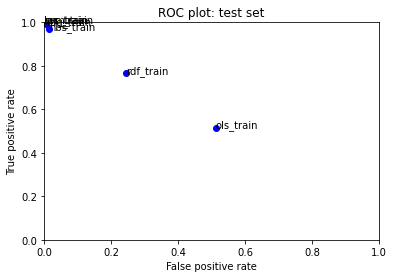

In [12]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]


for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [13]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [14]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
150
This film comes as the ultimate disappointment in Tsai Ming-Liang for me. It oozes laziness from its every frame. So I'm not going to analyse it thoroughly either. But some observations:<br /><br />1. If the premise is drought, why we get to see city landscapes with blooming green trees? I wonder if that was supposed to mean something in the metaphorical context of the film (in which thirst notifies the craving for intimacy, and watermelon the trivial substitute, sex). Or it is only a matter of lousy film-making, not giving a damn about being coherent.<br /><br />2. We don't get to know what had happened to the porn actress, why she is unconscious or, presumably, dead. It seems a question of no importance as long as the message of supreme alienation is successfully (=bombastically) delivered, but in retrospect, her inert body proves to be a cheap dramaturgical gimmick, a pretext  just as gratuitous and exploitative as the activity it is employed in.<br

3898
Despite its flaws, I enjoyed \Cigarette Burns\", John Carpenter's Season One episode in the Masters of Horror series. Yes, the story seemed like a cheap cross between IN THE MOUTH OF MADNESS and 8MM, but it was still quite good for the budget and time constraints given to it. With \"Pro-Life\", however, the low budget and time constraints definitely show more than anything else. There is solid directing as always from Carpenter yet there is a quality to the writing and whole production itself that gives the feeling it was made in a total and complete rush. The script isn't always clear, the message fuzzy, and the story is full of plot holes once you look back on them. Maybe had Carpenter re-written the script, it could have been a worthwhile episode. Instead, it's a mess that only hardcore Carpenter fans will find the slightest enjoyment in. Definitely the worst Carpenter has ever done. 2/10"
* * * * * * * * * 
3939
A cheesy, compellingly awful (and NOT in a fun way) C Grade movie

7398
Already his first claim, that desires are always artificial, is totally fallacious.<br /><br />When a Jehovah Witness reject gets his own documentary on movies  or anything for that matter - it's time for anyone to get their own. Although far, far more intelligent than, say, Paris Hilton (I know, not too difficult) Zizek's mouth spews just as much baloney as hers, just a different kind. He combines the worst from both his professional worlds: psychoanalysis and philosophy. Both fields are notorious for conveniently offering the expert b*lls***osopher plenty of leeway to create unprovable theories, to rant without a beginning or end, and to connect concepts almost randomly, in the process misusing the English language by creating a semantic jumble only a mother can love. Example: there are three main Marx brothers hence what a \great\" idea to connect them with three levels of human consciousness, the id, the ego and the super-ego. I'm kind of surprised he didn't play a clip from 

!!!!! POSSIBLE SPOILER !!!!!<br /><br />You`d think a story involving Archie Grey Owl - An Englishman posing as a red indian - would have a massive amount of humour involved . In fact I`d say the only way to treat a film like this where a remarkable man cons the gullible public is to treat it as a comedy . However Richard Attenborough commits something akin to a crime by making GREY OWL a serious drama . Worse , he`s made an extremely dire film too . Pierce Brosnan lacks the charisma needed for the title role and the romantic subplot between Grey Owl and Pony ( Played by the equally wooden Annie Gaupeau ) lacks any type of on screen chemistry . But to be fair to the cast their not helped with the script which fails to portray Archie as the cheeky chappy he is of fooling everyone into believing he`s a native American . The producers and screenwriter have made the major error of having the film centre around the plot twist of Archie being an Englishman - That`s why I wrote \ Possible spo

10345
I expected alot from this movie. Kinda like Lee as a Naustradamous like caracter but instead all I got was a waste of time and a boring movie. I can't even explain this movie. It had wooden acting, terrible script from pieces from the Bible like hurricanes, tidal waves and earthquakes. But that was at the end! The rest of it I had to wait and hope that something meaningfull would happen but it didn't. This movie is about a couple that tries to find out the changes going on in the world like places in China where there was an earthquake and end up at a convent run by eight nuns and a priest. The convent end up being the key to the misshappenings. The whole movie is missleading and boring. One of Lees worst.
* * * * * * * * * 
10466
The Priyadarshan/Paresh Rawal combo has been golden before with the likes of HERA PHERI and HUNGAMA so I went into the movie (at an Indian multiplex) with high hopes, especially after the slick promos. Unfortunately, like HULCHUL before it, this movie w

12251
The End of Violence and certainly the Million Dollar hotel hinted at the idea the Wenders has lost his vision, his ability to tell compelling stories through a map of the moving picture. The Land of Plenty seals the coffin, I'm afraid, by being a vastly unimaginative, obviously sentimental and cliché'd film. The characters are entirely flat and stereotyped, the writing, plot and direction are amateurish, at best. For the first time in quite a while, I was impatient for the film to end so I could get on with my life. The war-torn delirium of the uncle, the patriotic abstract gazing at the sky at the conclusion...it all just struck me as being so simple and pathetic, hardly the work of a filmmaker who once made some compelling magic on screen. What happened? The days of experimentation, perceptive writing and interesting filming possibilities are long behind him, I'm afraid. Let's hope he finds his inspiration again... At the Toronto film festival, which is where I saw the film, We

14030
Dave is going through a divorce and his mind wanders back to his first love. \Wanders\" is probably not the word. I should say he fixates on the past girlfriend. He recalls to the day when the relationship ended. The dream sequences only lack the hazy transitions. He fondly recalls their favorite songs and places they went. I'm not a counselor, but maybe this had something to do with the failed marriage???? Dave goes to a support group and meets up with a lady half his age (also divorced) who, instead of being \"turned off\" by his creepiness, starts to become interested in him. Did I mention how creepy Dave is? He sometimes refers to himself in the third person. He doesn't move his arms when he walks, either. It's just weird. Too make a long story short, Dave plots to hunt down Mary (the old gal friend) and kill her...err...I mean confront her. He does so. Which was really creepy. He believes her to be married, yet he STILL flies half-way across the country to meet her. He stake

14624
Lately they have been trying to hock this film late-night on cable TV commercials. Don't believe the hype. I was one of the unlucky people to see this stinker in theatres. This is, in my opinion, the 3rd Worst Movie of All Time, just behind Mac & Me (#1 Worst), and Jack Frost (#2 Worst), but I must admit, they are all close and all TERRIBLE! Really, nothing of this movie is funny, or disturbing, or anything else it claims to be so don't waste your money. The only thing it is good for is giving to your worst enemy. I'm not lying about that. Someone who you would love to kill or torture would be a prime candidate for this film. It is that awful. If you don't believe me then you deserve to suffer through the misery of watching this, which I doubt you can finish. Two Thumbs Enthusiastically Down.
* * * * * * * * * 
14636
This movie proves that good acting comes from good direction and this does not happen in Ask the Dust. Colin Farrell is usually a fine actor but in this he is juveni

16267
Please humour me if you will, for a minute while I read you the back of the ALLEY CAT VHS box. It says that:<br /><br />In this part of the city every street is a dead end- on every corner something to buy- in every alley another way to die- To survive you're got to be the best- just like the Alley Cat. Alley Cat- this lady owns the night. On the streets where even the predators become victims she knows how to survive- Cross her and you've run out of luck. Alley Cat- This animal is aroused.<br /><br />Now isn't that one of the most pathetic blurbs you've ever heard in your life? Whoever wrote that must be insane if they thought such a awful description could tempt us into viewing the video. Yet unfortunately, whichever faceless individual was responsible for that tragic use of English was doing their job only too well.. the movie contained within the little plastic case IS as bad as it sounds, and then some.<br /><br />Karin Mani plays the title role, and the script basically tel

17188
Um... Okay, I guess I get the whole shaky-cam, gorilla-style filming technique but unfortunately I think a gorilla could have made a better movie... This thing was just a complete mess from the get go. Bad acting, bad directing, bad story and horrific cinematography. How this piece of garbage was released I will never know, but it has and unfortunately I watched it. Filmed on location in Tennessee by the directing team of Greg Swinson and Ryan Thiessen (Harry and Lloyd), \Five Across The Eyes\" I'm assuming is supposed to resemble a \"Blair Witch\" type film but falls short... Okay it nose dives off a cliff. I was actually embarrassed for these young women, whom I'm sure were promised Hollywood stardom, but ended up in this dung heap. The dialog is ridiculous, and actually aggravates you as you listen to it. How this is supposed to be a horror flick is another mystery, as there is nothing even remotely scary about it, except for the fact that I watched it... Try this one on for s

19507
Firstly,I must admit that it isn't a good movie. And,I would never watch this movie if Pacino wasn't in it.<br /><br />The movie is about a publicist's strange 24 hours.And he is overworked,dizzy,sick and sometimes regretful.I don't like the character at all.It's really boring,after 20 minutes you may fall asleep.And I don't understand why Pacino wanted to be a part of this horrible movie.Just because of money or what?<br /><br />Since I'm an avid Pacino fan,I bought this 2002 movie People I Know.If you haven't bought it yet,don't even think about it,it's just a waste of time.
* * * * * * * * * 
19524
A truly muddled incomprehensible mess. Most things in the film look more or less like 1987, but then there are futuristic things just thrown in, like the policeman's ray gun. And that car! The director seemed to be in love with colored lights. The only really notable performance was the girl who played Valerie, but since there was no cast listing, I don't know which actress that was

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [15]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 1352, 'TN': 1180, 'FP': 1319, 'FN': 1149, 'Accuracy': 0.5064, 'Precision': 0.5061774616248595, 'Recall': 0.5405837664934027, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [16]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2071, 'TN': 2057, 'FP': 442, 'FN': 430, 'Accuracy': 0.8256, 'Precision': 0.8241146040588938, 'Recall': 0.8280687724910036, 'desc': 'svm_test'}


### MODEL: logistic regression

In [17]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2090, 'TN': 2047, 'FP': 452, 'FN': 411, 'Accuracy': 0.8274, 'Precision': 0.8221872541306058, 'Recall': 0.8356657337065174, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [18]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 1880, 'TN': 1882, 'FP': 617, 'FN': 621, 'Accuracy': 0.7524, 'Precision': 0.7529034841810173, 'Recall': 0.7516993202718912, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [19]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2088, 'TN': 2047, 'FP': 452, 'FN': 413, 'Accuracy': 0.827, 'Precision': 0.8220472440944881, 'Recall': 0.8348660535785686, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [20]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 2246, 'TN': 2141, 'FP': 358, 'FN': 255, 'Accuracy': 0.8774, 'Precision': 0.8625192012288786, 'Recall': 0.8980407836865254, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [21]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2501, 'Neg': 2499, 'TP': 1912, 'TN': 1872, 'FP': 627, 'FN': 589, 'Accuracy': 0.7568, 'Precision': 0.753052382827885, 'Recall': 0.7644942023190724, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

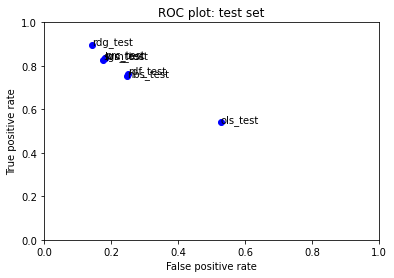

In [22]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [23]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='moviereviews_test.tsv', my_random_seed=21, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 262144)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [24]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = rdg.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.4836


In [25]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [26]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,0
3,7186_2,1
4,12128_7,1


In [27]:
my_submission.shape

(25000, 2)

In [28]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('moviereviews_submission2.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation